In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('titanic_data1.xlsx', usecols=['Id','вижив','клас','стать','вік','К-сть\nдітей','Fare'])
df.rename(columns={'К-сть\nдітей':'к-сть_дітей'},inplace=True)

In [4]:
df['стать_binarize'] = df.стать.map({'female': 1, 'male': 0})
df

,Id,вижив,клас,стать,вік,к-сть_дітей,Fare,стать_binarize
0,1,0,3,female,18,1,17.8000,1
1,2,0,3,male,37,4,39.6875,0
2,3,0,3,male,21,0,7.8000,0
3,4,1,1,female,49,1,76.7292,1
4,5,1,2,female,29,1,26.0000,1
5,6,0,1,male,65,0,61.9792,0
6,7,1,1,male,55,2,35.5000,0
7,8,1,2,female,21,0,10.5000,1
8,9,0,3,male,28,0,7.2292,0
9,10,1,2,female,21,1,27.7500,1


In [5]:
features = ['клас', 'стать_binarize', 'вік', 'к-сть_дітей', 'Fare']
X = df[features].to_numpy()
Y = df['вижив'].to_numpy()

In [6]:
F = np.insert(X, 0, 1, axis=1)
least_squares_value = np.dot(np.dot(np.linalg.inv(np.dot(F.T, F)), F.T), Y)
least_squares_value

array([ 6.20821083e-01, -1.26336286e-01,  6.13792337e-01, -1.68437210e-03,
       -4.06127757e-02,  1.13685089e-04])

In [7]:
Y_pred = np.dot(F, least_squares_value)

In [8]:
R2 = 1 - np.sum((Y_pred - Y) ** 2) / np.sum((np.mean(Y) - Y)**2)
print("Коефіцієнт детермінації:", R2, "\n")

Коефіцієнт детермінації: 0.3940402713388441 



In [33]:
posibility = 1 / (1 + np.exp(-Y_pred))
posibility

array([0.6871216 , 0.5053876 , 0.55164692, 0.72984831, 0.71001092,
       0.59677531, 0.58045819, 0.72066502, 0.54871291, 0.71281822,
       0.49417659, 0.55121423, 0.7414207 , 0.59569642, 0.51688394,
       0.59988735, 0.53383765, 0.71794437, 0.53233259, 0.66047688,
       0.52941046, 0.57821311, 0.64425178, 0.58446561, 0.53967864,
       0.54843144, 0.54997572, 0.54789735, 0.53866073, 0.57954704,
       0.69136139, 0.55126403, 0.54835971, 0.6948309 , 0.61127551,
       0.72201931, 0.6637351 , 0.54442192, 0.54790169, 0.7224047 ,
       0.55040383, 0.54831889, 0.55206501, 0.59467976, 0.5398515 ,
       0.5357535 , 0.54957006, 0.59359186, 0.61371308])

In [10]:
order = np.argsort(posibility)

In [11]:
n = len(Y)
points_x = np.array([])
points_y = np.array([])
points_x = np.append(points_x, 0)
points_y = np.append(points_y, 0)
for i in range(n):
    if((posibility[i] > 0.5) == (Y[i] == 1)):
        points_x = np.append(points_x, points_x[i])
        points_y = np.append(points_y, points_y[i]+1)
    else:
        points_x = np.append(points_x, points_x[i]+1)
        points_y = np.append(points_y, points_y[i])
points_x = (points_x-points_x.min())/(points_x.max()-points_x.min())
points_y = (points_y-points_y.min())/(points_y.max()-points_y.min())

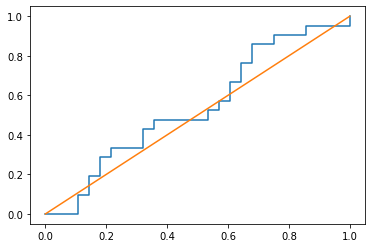

In [12]:
plt.plot(points_x, points_y)
plt.plot([0,1],[0,1])

In [13]:
AUC = 0
for i in range(n):
    AUC += (points_x[i+1]-points_x[i])*(points_y[i])
print(AUC)

0.5408163265306123


In [14]:
thresholds = np.linspace(0,1,n)
max_auc = 0
better_thresholds = 0
for i in thresholds:
    points_x = np.array([])
    points_y = np.array([])
    points_x = np.append(points_x, 0)
    points_y = np.append(points_y, 0)
    for j in range(n):
        if((posibility[j] > i) == (Y[j] == 1)):
            points_x = np.append(points_x, points_x[j])
            points_y = np.append(points_y, points_y[j]+1)
        else:
            points_x = np.append(points_x, points_x[j]+1)
            points_y = np.append(points_y, points_y[j])
    points_x = (points_x-points_x.min())/(points_x.max()-points_x.min())
    points_y = (points_y-points_y.min())/(points_y.max()-points_y.min())
    AUC = 0
    for j in range(n):
        AUC += (points_x[j+1]-points_x[j])*(points_y[j+1])
    if(abs(AUC) > max_auc):
        max_auc = abs(AUC)
        better_thresholds = i

In [15]:
better_thresholds

0.7083333333333333

In [16]:
n = len(Y)
points_x = np.array([])
points_y = np.array([])
points_x = np.append(points_x, 0)
points_y = np.append(points_y, 0)
for i in range(n):
    if((posibility[i] > better_thresholds) == (Y[i] == 1)):
        points_x = np.append(points_x, points_x[i])
        points_y = np.append(points_y, points_y[i]+1)
    else:
        points_x = np.append(points_x, points_x[i]+1)
        points_y = np.append(points_y, points_y[i])
points_x = (points_x-points_x.min())/(points_x.max()-points_x.min())
points_y = (points_y-points_y.min())/(points_y.max()-points_y.min())

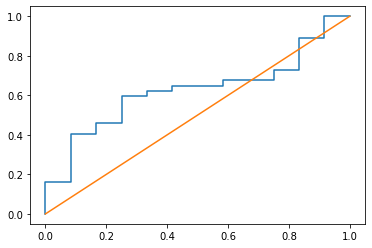

In [25]:
plt.plot(points_x, points_y)
plt.plot([0,1],[0,1])

In [26]:
AUC = 0
for i in range(n):
    AUC += (points_x[i+1]-points_x[i])*(points_y[i])
print(AUC)

0.6261261261261262


In [27]:
classFare = df[['клас', 'Fare']].to_numpy()
Fare3 = np.array([])
for i in range(n):
    if classFare[i][0] == 3.0:
        Fare3 = np.append(Fare3, classFare[i][1])
meanFare = Fare3.mean()
meanFare

16.428333333333335

In [28]:
X_test1 = np.array([1, 3, 1, 25, 0, meanFare])       

In [29]:
test1 = 1 / (1 + np.exp(-np.dot(X_test1, least_squares_value)))
test1

0.6932511305074461

In [30]:
X_test2 = np.array([1, 3, 1, 25, 1, meanFare])

In [31]:
test2 = 1 / (1 + np.exp(-np.dot(X_test2, least_squares_value)))
test2

0.684547547783276

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


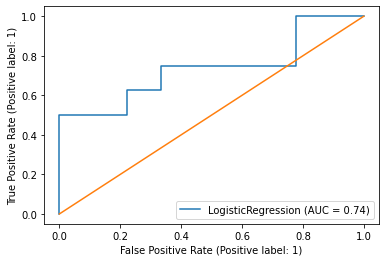

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

X_train, X_test, y_train, y_test = train_test_split(df[features], df['вижив'], 
                                                    test_size=0.33, random_state=42)

clf = LogisticRegression()
clf.fit(X_train,y_train)

plot_roc_curve(clf, X_test, y_test) 
plt.plot([0,1],[0,1])
plt.show()